In [6]:
#import_function
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import os
from datetime import datetime
from statistics import stdev

In [7]:
#Temperature_average_function
#~~~~~~~~~~~~~~~~connecting folder to python
##folder path will need to be changed, duh
folder_path = str(os.getcwd()+"\\Csv_files")
folder_contents = os.listdir(folder_path)
csv_files = []
TC_Group_1_AVG = []
TC_Group_2_AVG = []
TC_Group_3_AVG = []
Time_Group = []
#~~~~~~~~~~~~~~~~~averaging statement
for file in folder_contents:
##will need to change the endswith and startswith when changing file
    if file.endswith(".csv"):
        #print(":3")
        csv_files.append(os.path.join(folder_path, file))

for file in csv_files:
    #TC1-4
    df = pd.read_csv(file)
    ##will read_(whatever) will need to be changed depending on file type
    TC_1_4 = ["TC1","TC2","TC3","TC4"]
    ##will need to be changed depending on which thermocouple is the extra one
    TC_1_4_AVG = df[TC_1_4].mean()  
    AVG_Group_1 = TC_1_4_AVG.mean().round(3)
    TC_Group_1_AVG.append(AVG_Group_1)  

    #TC5-8
    TC_5_8 = ["TC5","TC6","TC7","TC8"]
    ##will need to be changed depending on which thermocouple is the extra one    
    TC_5_8_AVG = df[TC_5_8].mean()
    AVG_Group_2 = TC_5_8_AVG.mean().round(3)
    TC_Group_2_AVG.append(AVG_Group_2)

    #TC10-13
    TC_10_13 = ["TC10","TC11","TC12","TC13"]
    ##will need to be changed depending on which thermocouple is the extra one
    TC_10_13_AVG = df[TC_10_13].mean() 
    AVG_Group_3 = TC_10_13_AVG.mean().round(3)
    TC_Group_3_AVG.append(AVG_Group_3)

    #time???
    df['time_seconds'] = pd.to_datetime(df['Time']).dt.hour * 3600 + pd.to_datetime(df['Time']).dt.minute * 60# + pd.to_datetime(df['Time']).dt.second + pd.to_datetime(df['Time']).dt.microsecond *(1E-6)

    Lime = ['time_seconds']
    Time = (Lime)
    Time_AVG = df[Time]
    AVG_Time = Time_AVG.mean()
    AVG_Time_Hour = (AVG_Time) * (1/3600)
    Time_Group.append(AVG_Time_Hour.to_list())
    #unneccesary rounding section that makes my code crash if I attempt to remove it, load bearing ig
    Time_Group_Round = []
    for x in Time_Group:
        Rounded = np.round(x,2)
        Time_Group_Round.append(Rounded)    
#~~~~~~~~~~~~~~~~~~ordering statment    
TC_Group_1_AVG
TC_Group_2_AVG
TC_Group_3_AVG
Time_Group_Round
##may need to be removed if future data starts off ordered from starting-> end
First = Time_Group_Round[0]
Time_From_0 = []
#neccessary rounding section
for x in Time_Group_Round:
    Blorb = x - First
    Zarp = np.round(Blorb,2)
    Time_From_0.append(Zarp)

#chart making section
data = {
    "Time" : Time_From_0,
    "G1Average" :  TC_Group_1_AVG,
    "G2Average" :  TC_Group_2_AVG,
    "G3Average" :  TC_Group_3_AVG
    }
df = pd.DataFrame(data)
df

,Time,G1Average,G2Average,G3Average
0,[0.0],28.277,26.029,11.991
1,[0.46],78.478,61.351,19.941
2,[1.06],90.882,75.861,25.356
3,[1.54],92.126,77.485,23.629
4,[1.74],92.172,77.360,21.088
5,[1.92],92.163,77.255,20.690
6,[2.29],92.053,77.022,20.860
7,[2.62],91.906,76.656,20.197
8,[2.85],91.804,76.390,20.452
9,[3.03],91.716,76.198,20.123


In [8]:
SD_G1 = []

SD_1_T = []
SD_2_T = []
SD_3_T = []
for file in csv_files:
    TC_AVG_1_4 =[]
    TC_AVG_5_8 = []
    TC_AVG_10_13 = []
    for i in range(1,5,1):
        df = pd.read_csv(file)
        
        TC = df[f"TC{i}"].mean()
        TC_AVG_1_4.append(TC)
    
    for i in range(5,9,1):
        df = pd.read_csv(file)
        
        TC = df[f"TC{i}"].mean()
        TC_AVG_5_8.append(TC)
        
    for i in range(10,14,1):
        df = pd.read_csv(file)
        
        TC = df[f"TC{i}"].mean()
        TC_AVG_10_13.append(TC)
    SD1 = np.std(TC_AVG_1_4)
    SD_1_T.append(SD1)
    SD2 = np.std(TC_AVG_5_8)
    SD_2_T.append(SD2)
    SD3 = np.std(TC_AVG_10_13)
    SD_3_T.append(SD3)
print(SD_1_T)
print(SD_2_T)
print(SD_3_T)



[0.03511819862476508, 0.7006766078843778, 0.35928990697924795, 0.32471362753577404, 0.33070407672309116, 0.33558409427120195, 0.3567202480025369, 0.38432701606321235, 0.40843964061152727, 0.42680156923920354, 0.4308948270530906, 0.42645675531941746]
[1.3082592326836953, 2.133469995369834, 1.5369624815904435, 1.8145785810242563, 2.010601629245614, 2.123598306864522, 2.3528743313539455, 2.4346739536070015, 2.433351502471624, 2.5866193517714215, 2.593154939409023, 2.616301905094335]
[0.887361501376306, 1.1830771764722146, 2.5649288916051463, 1.4348918115386136, 3.8330878371913717, 3.924112133591784, 4.071401430668483, 3.823405377732306, 4.628369124207144, 4.564905883391354, 4.481668088431671, 4.740401131353103]


In [9]:
data = {
    "Time" : Time_From_0,
    "G1Average" :  SD_1_T,
    "G2Average" :  SD_2_T,
    "G3Average" :  SD_3_T
    }
df = pd.DataFrame(data)
df

,Time,G1Average,G2Average,G3Average
0,[0.0],0.035118,1.308259,0.887362
1,[0.46],0.700677,2.133470,1.183077
2,[1.06],0.359290,1.536962,2.564929
3,[1.54],0.324714,1.814579,1.434892
4,[1.74],0.330704,2.010602,3.833088
5,[1.92],0.335584,2.123598,3.924112
6,[2.29],0.356720,2.352874,4.071401
7,[2.62],0.384327,2.434674,3.823405
8,[2.85],0.408440,2.433352,4.628369
9,[3.03],0.426802,2.586619,4.564906


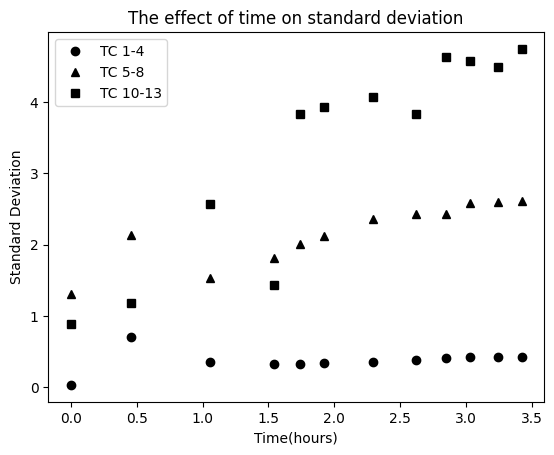

In [10]:
#varialable setup
y1 = df['G1Average']
y2 = df['G2Average']
y3 = df['G3Average']
#graph setup
plt.plot(Time_From_0,y1,'o',label="TC 1-4", color=("black"))
plt.plot(Time_From_0,y2,'^',label="TC 5-8",color=("black"))
plt.plot(Time_From_0,y3,'s',label="TC 10-13",color=("black"))
plt.xlabel('Time(hours)')
plt.ylabel("Standard Deviation")
plt.title("The effect of time on standard deviation")
plt.legend()